In [1]:
# Library for pickling
import joblib

# Library needed for counting categorical values
import collections

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Model library
from sklearn.linear_model import LogisticRegression

# Scaling
from sklearn.preprocessing import StandardScaler

# label encoder
from sklearn.preprocessing import LabelEncoder

# Onehot encoding
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

# Metrics library
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Libary needed for resampling data
from sklearn.utils import resample


In [2]:
# Load the pickled file

personalLoan_df = pd.read_csv('personal-loan.csv')
 
#df.to_pickle('personal-loan.pkl') 
#personalLoan_df = joblib.load('personal-loan.pkl')  

# Check
personalLoan_df.head(10)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no
5,4491,44.0,18.0,3.0,Advanced or Professional,49.0,0,no,0.0,0,0,yes,no
6,706,42.0,16.0,4.0,Advanced or Professional,23.0,0,no,0.0,0,0,yes,no
7,5327,64.0,38.0,2.0,Undergraduate,112.0,0,no,0.0,0,0,no,no
8,5269,43.0,7.0,4.0,Graduate,28.0,83,yes,0.9,0,0,yes,no
9,1918,25.0,8.0,1.0,Undergraduate,47.0,0,no,0.0,0,0,no,no


In [3]:
# What is the data type?
#type(personalLoan_df)
# or
print(type(personalLoan_df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
personalLoan_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   object 
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   object 
 12  personal_loan       6000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 609.5+ KB


In [5]:
# shape will return as tuple containing the number of rows and columns
#personalLoan_df.shape
#personalLoan_df.shape[0]
#personalLoan_df.shape[1]

# Note: the result of a line of code is automatically printed below the cell
# However, if there are more than one statements, then one of them will print its results
# And only the result of the last statement is visible
# But if you can override this behaviour by using print statements as shown below
print(personalLoan_df.shape)
print(personalLoan_df.shape[0])
print(personalLoan_df.shape[1])

(6000, 13)
6000
13


In [6]:
# By default, head() will display 5 rows
personalLoan_df.head()
# If you want to see more rows, pass the number as a parameter to the function
#personalLoan_df.head(10)

# Note: You can also use Excel to view the CSV file

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


# Fix data types (if required)

In [7]:
personalLoan_df.dtypes


customer_id             int64
age                   float64
yrs_experience        float64
family_size           float64
education_level        object
income                float64
mortgage_amt            int64
credit_card_acct       object
credit_card_spend     float64
share_trading_acct      int64
fixed_deposit_acct      int64
online_acct            object
personal_loan          object
dtype: object

In [8]:
# 1. Select the columns to label encode
# Make sure they are categorical columns containing word labels as label encoding will convert them to numeric labels
# If the categories are numbers, then no need to label encode!
# Better list all the columns and comment out the ones you don't need
columns_to_encode = [
    
    'education_level',
    'credit_card_acct',
    'online_acct',
    'personal_loan'
]

In [9]:
# 3. Instantiate a LabelEncoder
encoder = LabelEncoder()

In [10]:
# 4. Fit the encoder on the training column and transform the training and testing columns
# Use a loop to label encode all the required columns 
for col in columns_to_encode:
    # First fit the encoder to the training data
    encoder.fit(personalLoan_df[col])
    # Then transform both the training and the testing sets
    personalLoan_df[col] = encoder.transform(personalLoan_df[col])

In [11]:
personalLoan_df.head(1000)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,1,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,0,36.0,90,0,0.0,0,0,1,0
2,4209,61.0,3.0,2.0,2,145.0,314,0,0.0,0,1,1,1
3,4734,29.0,14.0,1.0,2,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,1,33.0,0,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3354,29.0,3.0,1.0,0,56.0,96,0,0.0,0,0,1,0
996,5631,37.0,29.0,1.0,0,106.0,0,0,0.0,0,0,0,0
997,1874,25.0,16.0,2.0,0,75.0,193,0,0.0,0,0,0,0
998,1955,47.0,42.0,4.0,1,68.0,105,1,2.5,0,0,1,0


In [12]:
# If you wanted to drop rows with duplicate values
print(personalLoan_df.shape)

# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
personalLoan_df.drop_duplicates(inplace=True) # will keep first copy

# You may want to reset the index
# REf: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
personalLoan_df.reset_index(drop=True, inplace=True) # reset index to default integer index

# Check
print(personalLoan_df.shape)

(6000, 13)
(6000, 13)


In [13]:
# DO NOT RUN THIS CODE - IT WILL CRASH AS THERE IS NO "date" field
# Suppose this data set contained a field called "date" 
# and you want to drop rows with duplicate dates
print(personalLoan_df.shape)

# If your dates are in string format (object), you need to convert them to datetime
#diabetes_df['date']  = diabetes_df.to_datetime(diabetes_df['date'])

# Next, sort the data on the date field
personalLoan_df.sort_values("customer_id", inplace=True) 

# Drop the duplicate rows
# subset can be a list e.g. subset=['col_a', col_b]
personalLoan_df.drop_duplicates(subset="customer_id", inplace=True) # will keep the first copy

# You may want to reset the index
personalLoan_df.reset_index(drop=True, inplace=True) # reset index to default integer index

# Check
print(personalLoan_df.shape)

(6000, 13)
(3786, 13)


# Handle missing values


In [14]:
# Count of missing values in the whole dataframe by column
#diabetes_df.isnull().count() # does not work - gives the count of non-null values
#diabetes_df.isna().sum() # isna() is the same as isnull()

personalLoan_df.isnull().sum()

customer_id             0
age                   230
yrs_experience        220
family_size           244
education_level         0
income                234
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64

In [15]:
# Display percentage of missing values (NaN) per column
# isna() - returns a dataframe of all boolean values True/False
# Each value is tested  whether it's missing or not
# Boolean values are treated as numeric 0/1 when doing arithmetic operations
# So we can calculate the sum and mean of a column of boolean value
# Instead of calculating the sum and dividing by the number of rows, we can use the mean directly

percent_missing = round(personalLoan_df.isna().mean() * 100, 4)
print(percent_missing)

customer_id           0.0000
age                   6.0750
yrs_experience        5.8109
family_size           6.4448
education_level       0.0000
income                6.1807
mortgage_amt          0.0000
credit_card_acct      0.0000
credit_card_spend     0.0000
share_trading_acct    0.0000
fixed_deposit_acct    0.0000
online_acct           0.0000
personal_loan         0.0000
dtype: float64


In [16]:
#Replace missing values with the median 
columns = ['age','yrs_experience','family_size','income']

#if you want to use SKLearn's SimpleInputer
imp_median=SimpleImputer(missing_values=np.nan,strategy='median')

for col in columns:
    print(col)
    #using SinpleImputer to replace all mising values in column with median value
    personalLoan_df[col]=imp_median.fit_transform(personalLoan_df[col].values.reshape(-1,1))
    #you can also use pandas to do the replcement (also called imputatuin)
    personalLoan_df[col].fillna(personalLoan_df[col].median(),inplace=True)

#Check - there should be zero percent missing values in all columns 
print(round(personalLoan_df.isna().mean() *100,4))

age
yrs_experience
family_size
income
customer_id           0.0
age                   0.0
yrs_experience        0.0
family_size           0.0
education_level       0.0
income                0.0
mortgage_amt          0.0
credit_card_acct      0.0
credit_card_spend     0.0
share_trading_acct    0.0
fixed_deposit_acct    0.0
online_acct           0.0
personal_loan         0.0
dtype: float64


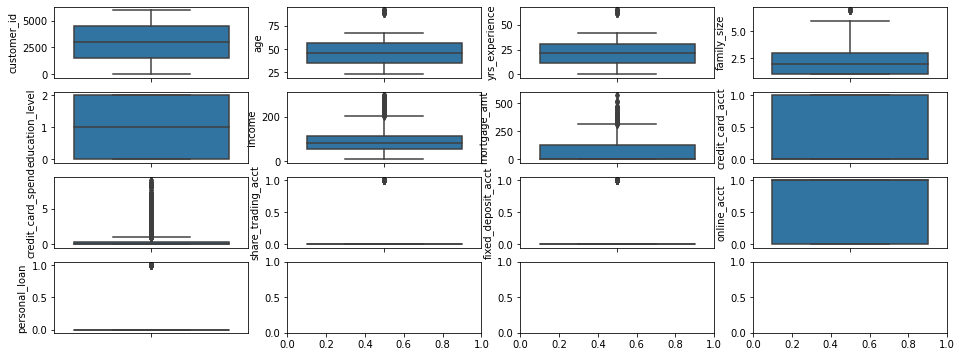

In [22]:
# Example 3 - subplots

fig, ax = plt.subplots(4,4, figsize=(16,6))  # 2 rows and 4 columns

# Row 0
ax1 = sns.boxplot(y=personalLoan_df["customer_id"], ax=ax[0,0]) # row 0, col 0
ax2 = sns.boxplot(y=personalLoan_df["age"], ax=ax[0,1]) 
ax3 = sns.boxplot(y=personalLoan_df["yrs_experience"], ax=ax[0,2])
ax4 = sns.boxplot(y=personalLoan_df["family_size"], ax=ax[0,3])

# Row 1
ax5 = sns.boxplot(y=personalLoan_df["education_level"], ax=ax[1,0])
ax6 = sns.boxplot(y=personalLoan_df["income"], ax=ax[1,1])
ax7 = sns.boxplot(y=personalLoan_df["mortgage_amt"], ax=ax[1,2])
ax8 = sns.boxplot(y=personalLoan_df["credit_card_acct"], ax=ax[1,3])
# Row 2
ax9 = sns.boxplot(y=personalLoan_df["credit_card_spend"], ax=ax[2,0])
ax10 = sns.boxplot(y=personalLoan_df["share_trading_acct"], ax=ax[2,1])
ax11 = sns.boxplot(y=personalLoan_df["fixed_deposit_acct"], ax=ax[2,2])
ax12 = sns.boxplot(y=personalLoan_df["online_acct"], ax=ax[2,3])
# Row 3
ax13 = sns.boxplot(y=personalLoan_df["personal_loan"], ax=ax[3,0])


In [18]:
personalLoan_df.dtypes


customer_id             int64
age                   float64
yrs_experience        float64
family_size           float64
education_level         int64
income                float64
mortgage_amt            int64
credit_card_acct        int64
credit_card_spend     float64
share_trading_acct      int64
fixed_deposit_acct      int64
online_acct             int64
personal_loan           int64
dtype: object

In [21]:
# Finding the percentages of outlier per columns
# Note: Outliers only apply to continuous numerical values - not to strings or numerical categories!
# So, be careful what you include in the list of column names
# remove education level, credit card acc, sharing trading acct, fixed deposit, online acct
#cerdit_card spend add in 
# Adding to the list
columns = [ 'income','yrs_experience','mortgage_amt','age','family_size','credit_card_spend','share_trading_acct','fixed_deposit_acct','personal_loan']
print(columns)
print()

for col in columns:
    percentile_25 = personalLoan_df[col].quantile(0.25)
    percentile_75 = personalLoan_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    total = len(personalLoan_df[col])
    #total = personalLoan_df[col].shape[0] # also works

    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper}")

    # Count all values that are less than the lower boundary OR those that are greater than the upper boundary
    #num_outliers = diabetes_df[(diabetes_df[col] < lower) | (diabetes_df[col] > upper)].count() 
    # returns a list of things
    num_outliers = len(personalLoan_df[(personalLoan_df[col] < lower) | (personalLoan_df[col] > upper)])
    
    pc_outliers = round(num_outliers*100/total,2)
    
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()

['income', 'yrs_experience', 'mortgage_amt', 'age', 'family_size', 'credit_card_spend', 'share_trading_acct', 'fixed_deposit_acct', 'personal_loan']

col: income, lower: -33.5, upper: 202.5
Num outliers: 70, total rows: 3786, percent: 1.85

col: yrs_experience, lower: -19.0, upper: 61.0
Num outliers: 52, total rows: 3786, percent: 1.37

col: mortgage_amt, lower: -189.0, upper: 315.0
Num outliers: 46, total rows: 3786, percent: 1.22

col: age, lower: 3.5, upper: 87.5
Num outliers: 44, total rows: 3786, percent: 1.16

col: family_size, lower: -2.0, upper: 6.0
Num outliers: 20, total rows: 3786, percent: 0.53

col: credit_card_spend, lower: -0.6000000000000001, upper: 1.0
Num outliers: 681, total rows: 3786, percent: 17.99

col: share_trading_acct, lower: 0.0, upper: 0.0
Num outliers: 367, total rows: 3786, percent: 9.69

col: fixed_deposit_acct, lower: 0.0, upper: 0.0
Num outliers: 310, total rows: 3786, percent: 8.19

col: personal_loan, lower: 0.0, upper: 0.0
Num outliers: 550, total r

In [23]:
# Using Inter Quartile Range (IQR) to detect outliers - for non-normal (non-Gaussian) distributions

# Adding to the list
columns = ['income','yrs_experience','age','family_size']

for col in columns:
    median_val = personalLoan_df[col].quantile(0.50)
    percentile_25 = personalLoan_df[col].quantile(0.25)
    percentile_75 = personalLoan_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    
    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper},  median_val: {median_val}")
    
    # Replace all outliers in column with median value
    # personalLoan_df all values that are less than the lower boundary OR those that are greater than the upper boundary
    personalLoan_df[col] = np.where((personalLoan_df[col] < lower) | (personalLoan_df[col] > upper), median_val, personalLoan_df[col])
 
#personalLoan_df.describe()
personalLoan_df.describe().T  # T means transpose - will transpose rows to column

col: income, lower: -33.5, upper: 202.5,  median_val: 82.0
col: yrs_experience, lower: -19.0, upper: 61.0,  median_val: 21.0
col: age, lower: 3.5, upper: 87.5,  median_val: 46.0
col: family_size, lower: -2.0, upper: 6.0,  median_val: 2.0


,count,mean,std,min,25%,50%,75%,max
customer_id,3786.0,3015.760169,1724.904216,3.0,1522.25,3029.0,4494.75,6000.0
age,3786.0,45.188325,12.071766,23.0,35.00,46.0,55.00,67.0
yrs_experience,3786.0,20.631537,11.895283,0.0,11.00,21.0,30.00,42.0
family_size,3786.0,2.413365,1.123084,1.0,1.00,2.0,3.00,6.0
education_level,3786.0,1.101690,0.837662,0.0,0.00,1.0,2.00,2.0
income,3786.0,85.130745,42.390561,8.0,55.00,82.0,111.00,202.0
mortgage_amt,3786.0,69.246434,88.606701,0.0,0.00,0.0,126.00,572.0
credit_card_acct,3786.0,0.298996,0.457879,0.0,0.00,0.0,1.00,1.0
credit_card_spend,3786.0,0.631643,1.430176,0.0,0.00,0.0,0.40,9.0
share_trading_acct,3786.0,0.096936,0.295910,0.0,0.00,0.0,0.00,1.0


In [24]:
personalLoan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3,43.0,33.0,1.0,0,54.0,0,0,0.0,0,0,1,0
1,8,60.0,12.0,3.0,1,121.0,125,1,2.1,1,0,1,1
2,10,63.0,13.0,4.0,1,30.0,98,0,0.0,0,1,1,0
3,11,35.0,12.0,1.0,0,121.0,0,0,0.0,0,0,0,0
4,12,37.0,29.0,3.0,1,47.0,0,1,0.9,1,0,1,0


In [25]:
# You might want to do a final check on the data
personalLoan_df.head() 

# You could also save the cleaned data as a CSV file
# However, when reloading the file again, floats might have changed back to strings (need to change again)
#personalLoan_df.to_csv('personalLoan-cleaned.csv', index=False) # Save in current folder
#diabetes_df.to_csv('data/diabetes-cleaned.csv', index=False) # save in data folder - make sure it exists
# If you saved the cleaned data as a CSV file, you can view its contents using Excel

# Note: If the last statement is saving to CSV, then you wont see the result of the head() function.
# Either, put the statement diabetes_df.head() last in the cell
# Or, use print(diabetes_df.head()), but then you will lose the nice formatting!



,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3,43.0,33.0,1.0,0,54.0,0,0,0.0,0,0,1,0
1,8,60.0,12.0,3.0,1,121.0,125,1,2.1,1,0,1,1
2,10,63.0,13.0,4.0,1,30.0,98,0,0.0,0,1,1,0
3,11,35.0,12.0,1.0,0,121.0,0,0,0.0,0,0,0,0
4,12,37.0,29.0,3.0,1,47.0,0,1,0.9,1,0,1,0


In [26]:
joblib.dump(personalLoan_df,'personalLoan-cleaned.pkl')

['personalLoan-cleaned.pkl']